## Project Title: 

### Leveraging Data Insights for Sales Optimization in 2019

## 1. Business Understanding


### 1.1. Introduction
In this project, we aim to design and deliver an end-to-end business intelligence solution leveraging transactional data from 2019 to provide valuable insights for our client. The client has collected data throughout the year but hasn't utilized it effectively to drive sales and improve operational efficiency. Our goal is to analyze the data comprehensively and present actionable insights that will enable the client to identify opportunities for growth and optimization.

### 1.2. Objectives
The main objectives of this project are as follows:

- Analyze the 2019 transactional data to determine the total revenue generated throughout the year.

- Identify any seasonal patterns or trends in sales to understand the seasonality of the business.

- Determine the best-selling and worst-selling products based on sales volume and revenue.

- Compare sales performance across different months or weeks to identify trends and fluctuations.

- Analyze the distribution of product deliveries across cities to identify key markets.

- Compare product categories in terms of revenue generated and quantities ordered to understand their contribution to overall sales.

### 1.3. Analytical  Questions
1. How much money did we make this year? 

2. Can we identify any seasonality in the  sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities  ordered?

### 1.4. Hypothesis
- Null Hypothesis (H0): The total revenue generated in 2019 is equal to or less than a predetermined benchmark or expectation.

- Alternative Hypothesis (H1): The total revenue generated in 2019 is greater than the predetermined benchmark or expectation.

### 1.5. Methodology
To achieve these objectives, we will follow a systematic methodology that includes the following steps:

1. Data Collection: Retrieve transactional data for the entire year of 2019 from both CSV files (January to June) and the remote database (July to December).

2. Data Preprocessing: Clean and preprocess the data to handle missing values, outliers, and inconsistencies.

3. Exploratory Data Analysis (EDA): Conduct exploratory data analysis to gain insights into the distribution, trends, and patterns within the data.

4. Statistical Analysis: Perform statistical analysis to answer specific questions such as total revenue, seasonal trends, best-selling products, etc.

6. Data Visualization: Visualize the findings using charts, graphs, and tables to facilitate understanding and interpretation.

7. Interpretation and Insights: Provide actionable insights and recommendations based on the analysis to help the client make informed decisions.

8. Report Generation: Prepare a comprehensive report summarizing the analysis, findings, and recommendations for the client's reference.


By following this methodology, we aim to deliver a robust business intelligence solution that empowers our client to optimize sales strategies, identify growth opportunities, and enhance operational efficiency.

## 2. Data Understanding

### 2.1. Data Description

####  Features
1. Order ID	- This feature represents a unique identifier for each order.
2. Product	- This feature represents the name or type of product ordered.
3. Quantity Ordered	- This feature represents the quantity of each product ordered
4. Price Each - This feature represents the price of each product.
5. Order Date - This feature represents the date and time when the order was placed
6. Purchase Address - This feature represents the address where the purchase was made


#### Numerical features
1. Quantity Ordered
2.  Price Each

#### Categorical features
1.  Order ID
2. Product
3. Purchase Address

#### Date features
1. Order Date

Installing libraries and Packages


In this section we will import all the packages/libraries that we will be using through this project

### 2.2. Importation


In [73]:
# Data Handling
import pandas as pd  # For data manipulation and analysis using DataFrames
import numpy as np  # For numerical operations and arrays
import pyodbc  # For handling connections to Microsoft SQL Server
from dotenv import dotenv_values  # For loading environment variables, possibly including database credentials
import os

# Statistical Analysis
import math  # Basic mathematical operations

# Warning Handling
import warnings  # To handle warnings in a way that they can be ignored
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats


### 2.3. Data Collection

#### 2.3.1. Load First Dataset (CSV Dataset)

In [13]:

# Directory path where CSV files for January to June are located
directory_path = r"../data"

# List of file names for each month
file_names = [
    "Sales_January_2019.csv",
    "Sales_February_2019.csv",
    "Sales_March_2019.csv",
    "Sales_April_2019.csv",
    "Sales_May_2019.csv",
    "Sales_June_2019.csv"
]

# Generate file paths for each month
file_paths = [os.path.join(directory_path, file_name) for file_name in file_names]

# Load CSV files into separate DataFrames
data_frames = [pd.read_csv(file) for file in file_paths]

# Combine DataFrames into a single DataFrame
first_half_data = pd.concat(data_frames, ignore_index=True)

# View first half of the dataset
first_half_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### 2.3.2. Load Second Dataset (from remote SQL Database)

In [14]:
# Load environment variables from .env file into a dictionary
config = dotenv_values("../.env")

# Get the values for the credentials set in the '.env' file
server = config.get("SERVER")
database = config.get("DATABASE")
username = config.get("USERNAME")
password = config.get("PASSWORD")

# Connection string
connection_string = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# Establish a connection
connection = pyodbc.connect(connection_string)

In [15]:
# Define SQL queries
sql_queries = [
    'SELECT * FROM dbo.Sales_August_2019',
    'SELECT * FROM dbo.Sales_July_2019',
    'SELECT * FROM dbo.Sales_September_2019',
    'SELECT * FROM dbo.Sales_October_2019',
    'SELECT * FROM dbo.Sales_November_2019',
    'SELECT * FROM dbo.Sales_December_2019'
]

# Execute queries and fetch data into DataFrames
data_frames = []
for sql_query in sql_queries:
    df = pd.read_sql(sql_query, connection)
    data_frames.append(df)

# Combine DataFrames into a single DataFrame
second_half_data = pd.concat(data_frames, ignore_index=True)

# View second half of the dataset
second_half_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00,"736 14th St, New York City, NY 10001"


## 3. Data Preparation

### 3.1. Data Cleaning

#### 3.1.1. Standardize columns for both datasets.

In [16]:
# Display the columns for the first half of the dataframe
first_half_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [17]:
# Display the columns for the second half of the dataframe
second_half_data.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

- The first half seems to have column names like 'Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date','Purchase Address, while the second half has column names like 'Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date','Purchase_Address.
- we need to standardize the column names first.

In [18]:
# Rename columns of the first half of the dataset
first_half_data.columns = ['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date', 'Purchase_Address']
first_half_data.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

#### 3.1.2. Concatenate Dataset

In [19]:
# Concatenate the two halves along the rows axis
full_year_data = pd.concat([first_half_data, second_half_data], ignore_index=True)

# Display the combined dataset
full_year_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [20]:
full_year_data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016"
186846,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186847,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101"
186848,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001"


#### 3.1.3. Check data structure

In [21]:
full_year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        186110 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


* From the table above we can observe the number of values in each column and the datatype as well.
* The datatype of Order ID, Quantity Ordered, Price Each, and Order Date are wrong and must be changed to their correct form.
* Other features will be generated and others will be dropped to ensure an accurate dataset for the purpose of this analysis.

In [22]:
f'There are {full_year_data.shape[0]} rows and {full_year_data.shape[1]} columns in the dataset.'

'There are 186850 rows and 6 columns in the dataset.'

#### 3.1.4. Handle missing values

In [23]:
# Check null values in the dataset
full_year_data.isnull().sum()

Order_ID            740
Product             545
Quantity_Ordered    740
Price_Each          740
Order_Date          740
Purchase_Address    545
dtype: int64

In [24]:
# Confirm rows with null values in the dataset
missing_values = first_half_data[full_year_data.columns].isnull().any(axis=1)
rows_with_missing_values = first_half_data[missing_values]
rows_with_missing_values.head(50)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
1491,NaN,NaN,NaN,NaN,NaN,NaN
1699,NaN,NaN,NaN,NaN,NaN,NaN
3047,NaN,NaN,NaN,NaN,NaN,NaN
3082,NaN,NaN,NaN,NaN,NaN,NaN
3584,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# View the last 20 rows for the missing values
rows_with_missing_values.tail(20)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
78221,NaN,NaN,NaN,NaN,NaN,NaN
79484,NaN,NaN,NaN,NaN,NaN,NaN
80030,NaN,NaN,NaN,NaN,NaN,NaN
80054,NaN,NaN,NaN,NaN,NaN,NaN
80134,NaN,NaN,NaN,NaN,NaN,NaN
80373,NaN,NaN,NaN,NaN,NaN,NaN
80999,NaN,NaN,NaN,NaN,NaN,NaN
81356,NaN,NaN,NaN,NaN,NaN,NaN
82758,NaN,NaN,NaN,NaN,NaN,NaN
82979,NaN,NaN,NaN,NaN,NaN,NaN


* Since the rows with missing values in the dataset have all columns to be missing, we cannot impute the missing values hence we will drop the null values in the dataset.

In [26]:
# Drop null values
full_year_data.dropna(inplace=True)

# Check null values to confirm dropping of the null values
full_year_data.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

#### 3.1.5 Remove duplicates

In [27]:
# Check duplicates in the dataset
f'There are {full_year_data.duplicated().sum()} duplicated rows in the dataset.'

'There are 423 duplicated rows in the dataset.'

In [28]:
# Confirm duplicated rows in the dataset
duplicates = full_year_data[full_year_data.duplicated()]
duplicates

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
181627,314675.0,AA Batteries (4-pack),1.0,3.84,2026-12-19 09:01:00,"927 13th St, San Francisco, CA 94016"
182185,315204.0,Wired Headphones,1.0,11.99,2012-12-19 12:41:00,"680 6th St, San Francisco, CA 94016"
182973,315955.0,ThinkPad Laptop,1.0,999.98999,2026-12-19 17:28:00,"588 Chestnut St, Seattle, WA 98101"
183200,316173.0,AAA Batteries (4-pack),1.0,2.99,2022-12-19 22:44:00,"907 Sunset St, Portland, OR 97035"


* The duplicated rows in the dataset will be dealt with by keeping the first occurence and dropping every other instance.

In [29]:
# Drop duplicates
full_year_data.drop_duplicates(keep='first', inplace=True)

# Confirm drop
f'There are {full_year_data.duplicated().sum()} duplicated rows in the dataset now.'

'There are 0 duplicated rows in the dataset now.'

#### 3.1.6. Check columns unique values

In [30]:
# Check unique values for product column
full_year_data['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', 'Product'], dtype=object)

* Product value in the Product column must be inspected to validate the value

In [31]:
# Check rows with Product value as value
full_year_data[full_year_data['Product'] == 'Product']

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


* This row in the dataset must be dropped since it is an invalid row with invalid values.

In [32]:
# Drop row with invalid column values
invalid_values = full_year_data[full_year_data['Product'] == 'Product'].index
full_year_data.drop(index=invalid_values, inplace=True)

In [33]:
# Confirm drop of row
full_year_data[full_year_data['Product'] == 'Product']

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address


In [34]:
# Inspect the Purchase Address column
full_year_data['Purchase_Address']

0                944 Walnut St, Boston, MA 02215
1               185 Maple St, Portland, OR 97035
2          538 Adams St, San Francisco, CA 94016
3             738 10th St, Los Angeles, CA 90001
4                  387 10th St, Austin, TX 73301
                           ...                  
186845    14 Madison St, San Francisco, CA 94016
186846      549 Willow St, Los Angeles, CA 90001
186847          273 Wilson St, Seattle, WA 98101
186848            778 River St, Dallas, TX 75001
186849    747 Chestnut St, Los Angeles, CA 90001
Name: Purchase_Address, Length: 185686, dtype: object

* The purchase address column contains multiple information which we will split for better analysis of the dataset.

* Columns such as Street Name, City, State, and ZIP Code will be extracted from this column after which the column itself will be dropped.

In [35]:
# Check unique values in the Order Date column
full_year_data['Order_Date'].unique()

array(['01/22/19 21:25', '01/28/19 14:15', '01/17/19 13:33', ...,
       Timestamp('2001-12-19 12:01:00'), Timestamp('2009-12-19 06:43:00'),
       Timestamp('2003-12-19 10:39:00')], dtype=object)

* From the output for the unique values in the order date column we observe that there are dates other then 2019 which we will have to get rid of to help us focus our analysis on the date needed alone.

#### 3.1.7. Convert data types

In [36]:
# Convert 'Order_Date' to datetime

full_year_data['Order_Date'] = pd.to_datetime(full_year_data['Order_Date'])

# Convert 'Quantity_Ordered' and 'Price_Each' to float


# Convert 'Price Each' column to numeric
full_year_data['Price_Each'] = pd.to_numeric(full_year_data['Price_Each'])

# Convert 'Quantity Ordered' column to numeric
full_year_data['Quantity_Ordered'] = pd.to_numeric(full_year_data['Quantity_Ordered'], downcast='integer')

# Convert 'Order_ID' column in the first dataset to float64
full_year_data['Order_ID'] = pd.to_numeric(full_year_data['Order_ID'], downcast='integer')

In [37]:
# Check data info to confirm changes
full_year_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185686 non-null  int32         
 1   Product           185686 non-null  object        
 2   Quantity_Ordered  185686 non-null  int8          
 3   Price_Each        185686 non-null  float64       
 4   Order_Date        185686 non-null  datetime64[ns]
 5   Purchase_Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int8(1), object(2)
memory usage: 8.0+ MB


### 3.2. Data Transformation

#### 3.2.1. Generate new features

In [38]:
# Filter out 2019 data from the entire dataset provided
data_2019 = full_year_data[full_year_data['Order_Date'].dt.year == 2019]
data_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [39]:
# Generate column for sales
data_2019['Sales'] = data_2019['Quantity_Ordered'] * data_2019['Price_Each']

In [40]:
# Split the value in the Purchase Address into Street Address, City, and State/ZIP Code
data_2019[['Street_Address', 'City','State/ZIP_Code']] = data_2019['Purchase_Address'].astype('str').str.split(',', expand=True)
data_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Sales,Street_Address,City,State/ZIP_Code
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,387 10th St,Austin,TX 73301


In [41]:
# Split the State/ZIP_Code column into their respective individual columns
data_2019[['State', 'ZIP_Code']] = data_2019['State/ZIP_Code'].astype('str').str.split(expand=True)

In [42]:
# Drop Purchase Address and State/ZIP_Code columns
data_2019.drop(['Purchase_Address', 'State/ZIP_Code'],axis=1, inplace=True)

data_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Sales,Street_Address,City,State,ZIP_Code
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,700.00,944 Walnut St,Boston,MA,02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,14.95,185 Maple St,Portland,OR,97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,23.98,538 Adams St,San Francisco,CA,94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,149.99,738 10th St,Los Angeles,CA,90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,11.99,387 10th St,Austin,TX,73301


In [43]:
# Extract Month and Day from the Order Date column
data_2019['Month'] = data_2019['Order_Date'].dt.month_name()

data_2019['Day'] = data_2019['Order_Date'].dt.day_name()

In [44]:
# Group product into high-level and basic-level based on their prices

group_list = [] # Create an empty list

for value in data_2019['Price_Each'].values:   # Loop throught the values in the column
    if value > 99.99:
        group_list.append('High Level') # Assign High level if price is greater than 99.99
    else:
        group_list.append('Basic Level')    # Assign Basic level if price is less than 99.99

data_2019['Product_Group'] = group_list # Add the list to the dataframe

In [45]:
# Inspect dataframe
data_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Sales,Street_Address,City,State,ZIP_Code,Month,Day,Product_Group
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,700.00,944 Walnut St,Boston,MA,02215,January,Tuesday,High Level
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,14.95,185 Maple St,Portland,OR,97035,January,Monday,Basic Level
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,23.98,538 Adams St,San Francisco,CA,94016,January,Thursday,Basic Level
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,149.99,738 10th St,Los Angeles,CA,90001,January,Saturday,High Level
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,11.99,387 10th St,Austin,TX,73301,January,Friday,Basic Level


## 4. Exploratory Data Analysis (EDA)

### 4.1. Summary statistics

#### 4.1.1. Analysis for numerical columns

In [46]:
# Select only numerical columns
numerical_columns = data_2019.select_dtypes(include=['number'])

# Generate summary statistics for numerical columns 
numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_ID,88478.0,185487.536540,29271.316178,141234.00,162462.25,183728.50,204923.75,319636.0
Quantity_Ordered,88478.0,1.125048,0.439837,1.00,1.00,1.00,1.00,9.0
Price_Each,88478.0,185.523855,333.119010,2.99,11.95,14.95,150.00,1700.0
Sales,88478.0,186.644234,333.581138,2.99,11.95,14.95,150.00,3400.0


##### Insights from the summary statistics

1. Order ID

- The count of order IDs is 185,686, indicating the total number of transactions in the dataset.
- The order IDs range from 141,234 to 319,670 as indicated by the Min and Max numbers.
- There are no missing values for order IDs, as the count matches the total number of rows in the dataset.

2. Quantity Ordered

- On average, approximately 1.12 items are ordered per transaction as indicated by the mean.
- The standard deviation of around 0.44 indicates that the quantity ordered varies moderately around the mean.
- The minimum quantity ordered is 1, and the maximum is 9, with the majority of transactions having a quantity ordered of 1 as indicated by the median and quartiles.

3. Price Each

- The mean price of each item ordered is approximately $184.52, with a standard deviation of $332.84, indicating significant variability in item prices.
- Item prices range from $2.99 to $1700.00.
- Most items have prices between $11.95 and $150.00, as indicated by the quartiles.

#### 4.1.2. Analysis for categorical columns

In [47]:
# Check the descriptive statistics for the categorical columns
data_2019.describe(include='object').T

,count,unique,top,freq
Product,88478,19,USB-C Charging Cable,10332
Street_Address,88478,39840,961 Jefferson St,9
City,88478,9,San Francisco,21273
State,88478,8,CA,35455
ZIP_Code,88478,10,94016,21273
Month,88478,12,April,18257
Day,88478,7,Thursday,13433
Product_Group,88478,2,Basic Level,55532


* From the descriptive statistics for the categorical columns given above, we get the count of values in the columns, the number of unique values, the most occuring values, and the frequency for the most occuring value.

### 4.2. Univariate Analysis

Text(0, 0.5, 'Total Daily Sales')

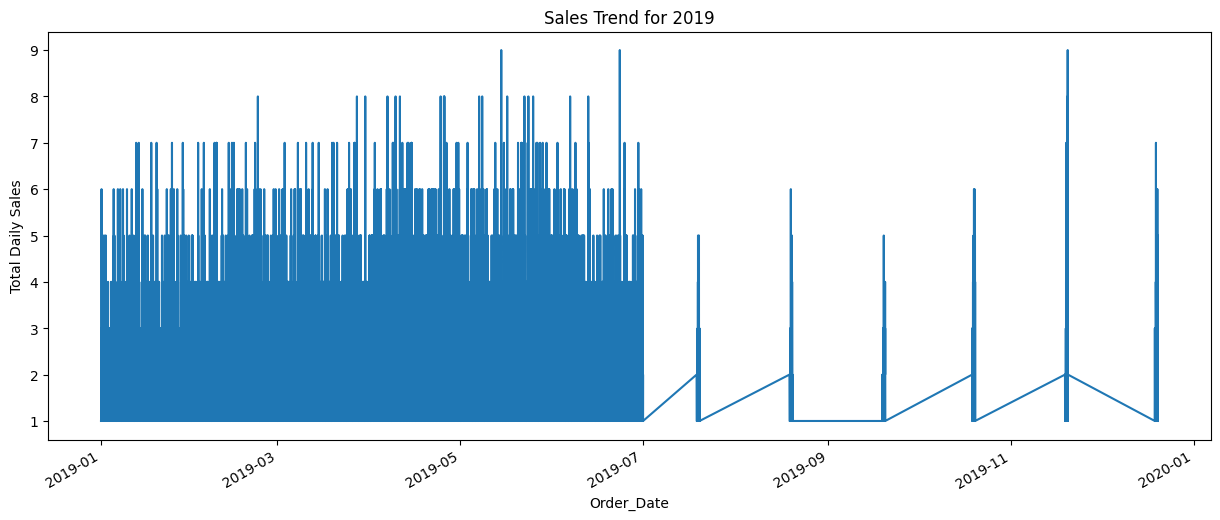

In [48]:
# Check trend of sales
daily_sales = data_2019.groupby('Order_Date')['Quantity_Ordered'].sum()
daily_sales.plot(kind='line',x='Order_Date', y='Quantity_Ordered', figsize=(15, 6), legend=False, title='Sales Trend for 2019')
plt.ylabel('Total Daily Sales')

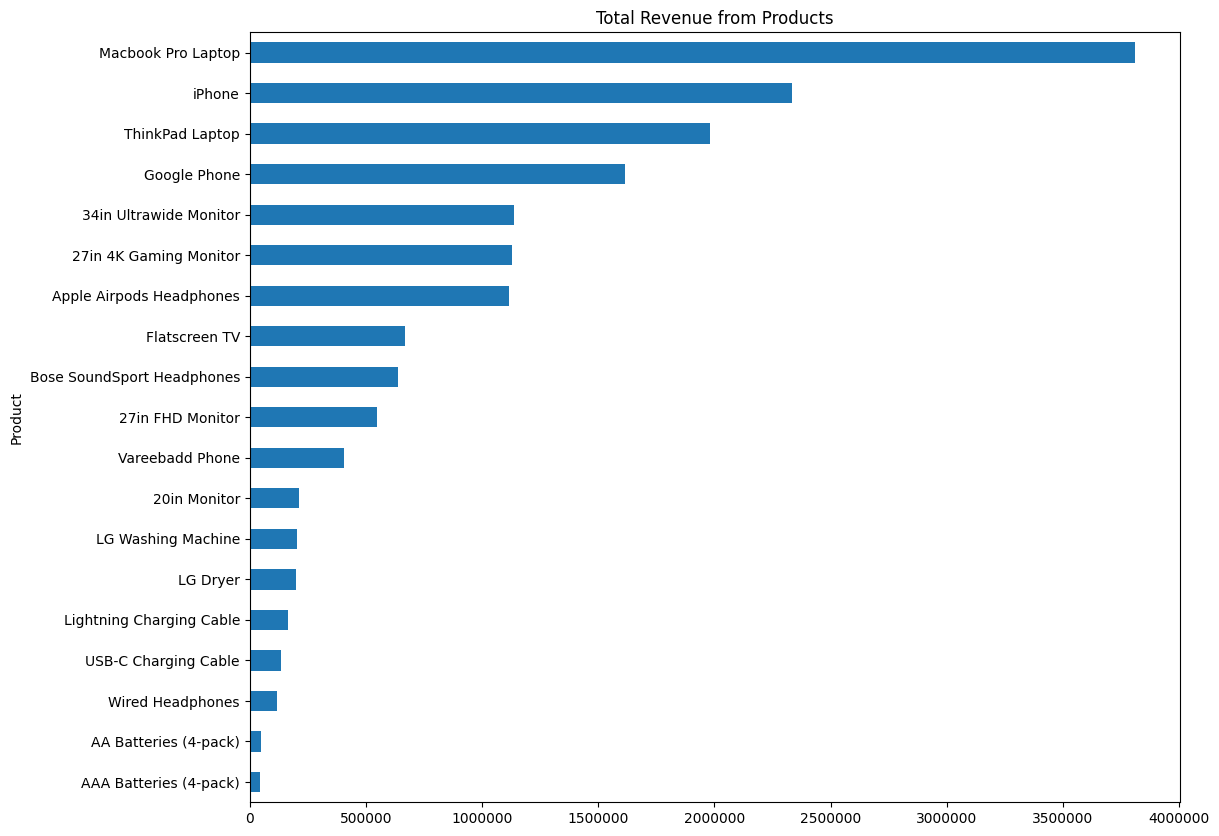

In [49]:
# Filter product sales for the days
product_sales = data_2019.groupby('Product')['Sales'].sum().sort_values(ascending=True).reset_index()

# Plot the total sales for the products
ax = product_sales.plot(kind='barh', x='Product', figsize=(12, 10), title='Total Revenue from Products', legend=False)
plt.ticklabel_format(axis='x', style='plain')


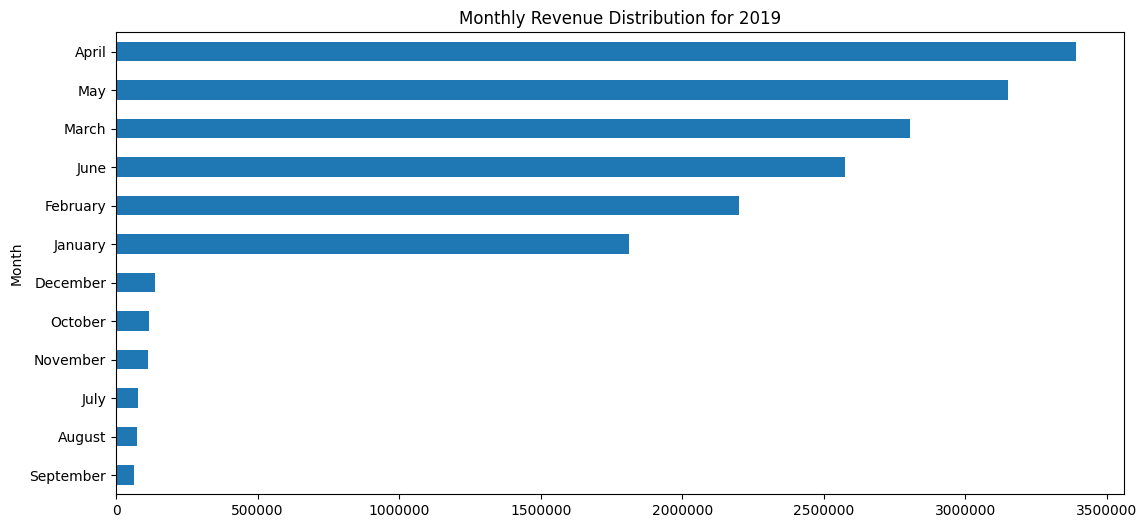

In [50]:
# Sales by month
monthly_total_sales = data_2019.groupby('Month')['Sales'].sum().sort_values(ascending=True)

monthly_total_sales.plot(kind='barh',figsize=(13, 6), title='Monthly Revenue Distribution for 2019')
plt.ticklabel_format(axis='x', style='plain')


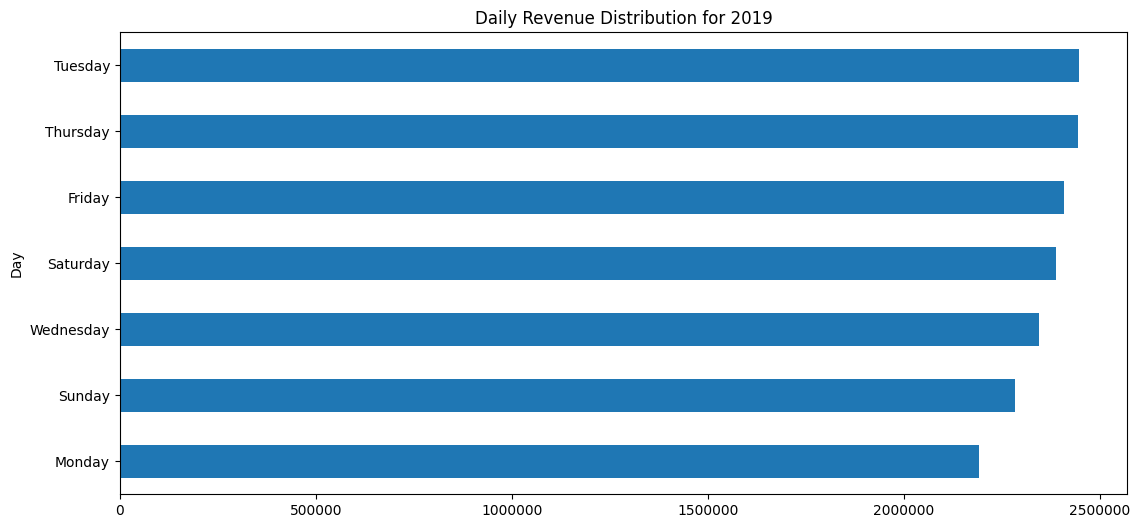

In [51]:
# Sales by week day
monthly_total_sales = data_2019.groupby('Day')['Sales'].sum().sort_values(ascending=True)

monthly_total_sales.plot(kind='barh',figsize=(13, 6), title='Daily Revenue Distribution for 2019')
plt.ticklabel_format(axis='x', style='plain')

### 4.3. Bivariate Analysis

In [52]:
# Numeric-Numeric Relationship: Correlation Matrix
numeric_vars = ['Quantity_Ordered', 'Price_Each']
numeric_corr = full_year_data[numeric_vars].corr()


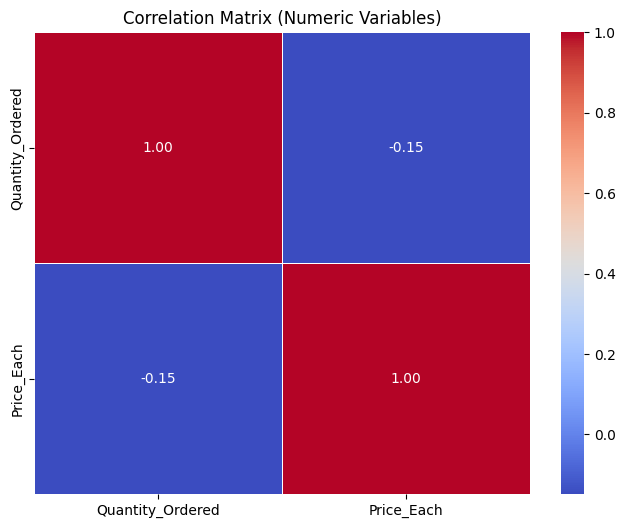

In [53]:

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Numeric Variables)')
plt.show()

### 4.3. Univariate Analysis

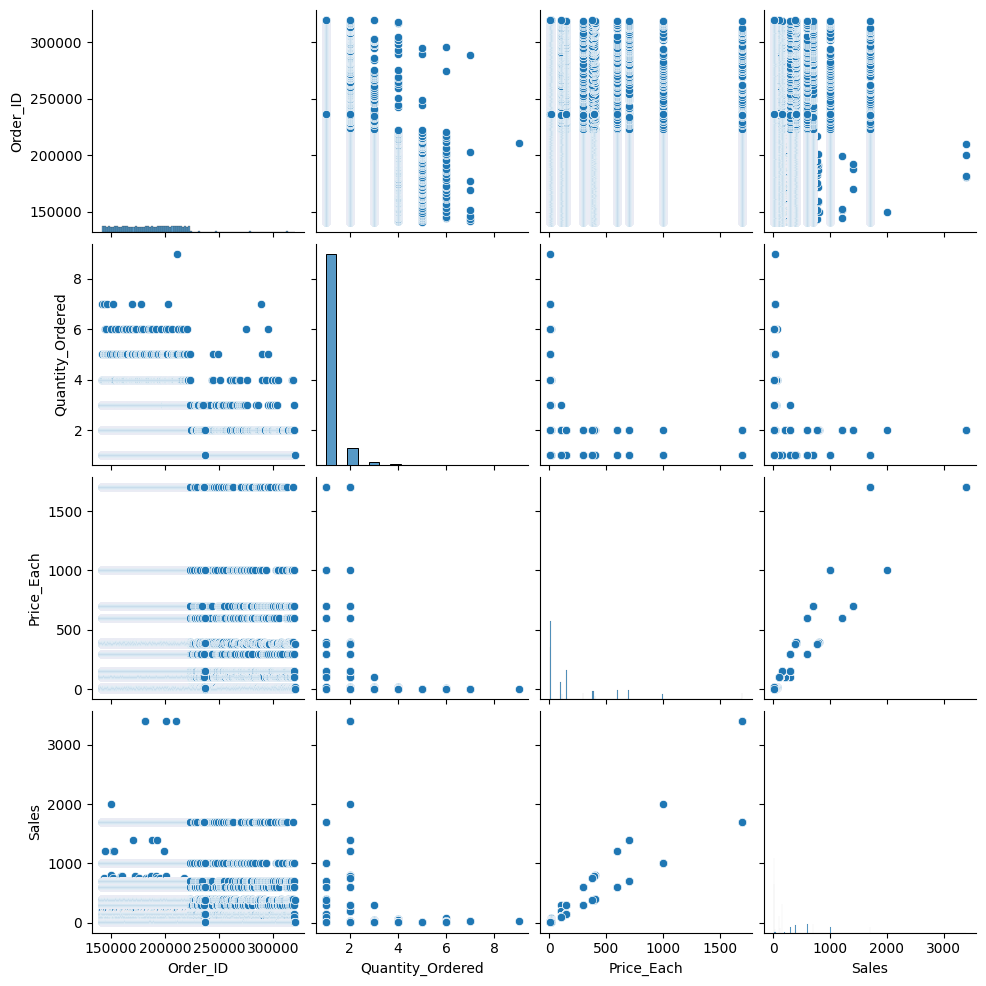

In [54]:
sns.pairplot(data_2019)

## 5. Answering Analytical Questions

### 5.1. How much money did we make in 2019?

In [55]:
f"The total amount of money made in 2019 was ${format(data_2019['Sales'].sum(), ',.2f')}"

'The total amount of money made in 2019 was $16,513,908.56'


### 5.2. Can we identify any seasonality in the  sales? 


To identify seasonality in sales, we'll analyze the sales data over time, specifically by month. We'll plot the total sales for each month over the entire duration of the dataset and look for recurring patterns or trends. 

1. Group the sales data by month.
2. Calculate the total sales for each month.
3. Plot the total sales for each month.


In [56]:
# Extract month from 'Order_Date'
full_year_data['Order_Month'] = full_year_data['Order_Date'].dt.month

# Calculate total sales for each month
monthly_sales = full_year_data.groupby('Order_Month')['Price_Each'].sum()


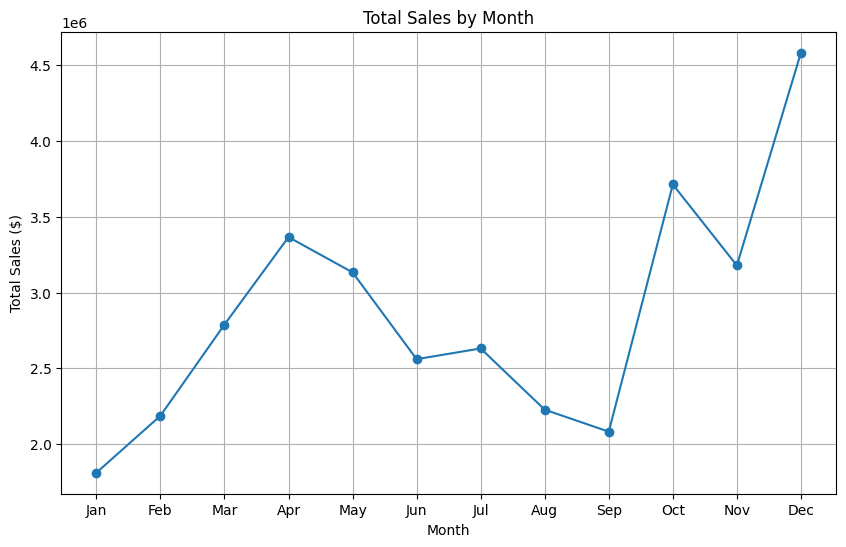

In [57]:
# Plot the data
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)



- Peak Months: We observe peaks in sales during certain months, December, October, and April. These months likely correspond to increased demand due to factors like holidays, promotions, or seasonal trends.
- Trough Months: During the months of June, August, and September. These months may represent periods of lower consumer spending or quieter seasons for the business.
- Opportunities for Improvement: By analyzing seasonality in sales, the business can identify opportunities to capitalize on peak months and mitigate challenges during slower periods. This could involve adjusting marketing strategies, offering targeted promotions, or optimizing inventory management.



### 5.3  What are our best and worst-selling products? 

- To find the best and worst-selling products, we will calculate both the total quantity sold and the total revenue generated for each product. Then, we will identify the products with the highest and lowest total quantity and revenue.

In [58]:
# Calculate total quantity sold for each product
total_quantity_sold = full_year_data.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending=False)

# Calculate total revenue generated for each product
total_revenue = full_year_data.groupby('Product')['Price_Each'].sum().sort_values(ascending=False)

# Identify best-selling products (by quantity and revenue)
best_selling_by_quantity = total_quantity_sold.head(5)
best_selling_by_revenue = total_revenue.head(5)

# Identify worst-selling products (by quantity and revenue)
worst_selling_by_quantity = total_quantity_sold.tail(5)
worst_selling_by_revenue = total_revenue.tail(5)


In [59]:
# Display the results
print("Best-selling products by quantity:")
print(best_selling_by_quantity)
print("\nBest-selling products by revenue:")
print(best_selling_by_revenue)
print("\nWorst-selling products by quantity:")
print(worst_selling_by_quantity)
print("\nWorst-selling products by revenue:")
print(worst_selling_by_revenue)


Best-selling products by quantity:
Product
AAA Batteries (4-pack)      30986
AA Batteries (4-pack)       27615
USB-C Charging Cable        23931
Lightning Charging Cable    23169
Wired Headphones            20524
Name: Quantity_Ordered, dtype: int64

Best-selling products by revenue:
Product
Macbook Pro Laptop        8.025700e+06
iPhone                    4.788000e+06
ThinkPad Laptop           4.125959e+06
Google Phone              3.313200e+06
27in 4K Gaming Monitor    2.427688e+06
Name: Price_Each, dtype: float64

Worst-selling products by quantity:
Product
ThinkPad Laptop       4128
20in Monitor          4126
Vareebadd Phone       2068
LG Washing Machine     666
LG Dryer               646
Name: Quantity_Ordered, dtype: int64

Worst-selling products by revenue:
Product
Lightning Charging Cable    323069.497765
USB-C Charging Cable        261215.047725
Wired Headphones            225999.507665
AA Batteries (4-pack)        78942.719043
AAA Batteries (4-pack)       61629.880107
Name: Pr

### 5.4 How do sales compare to previous months or weeks

In [60]:
# Extract month from 'Order_Date'
full_year_data['Order_Month'] = full_year_data['Order_Date'].dt.month

# Calculate total sales for each month
monthly_sales = full_year_data.groupby('Order_Month')['Price_Each'].sum()

# Calculate month-over-month growth rate
monthly_sales_growth = monthly_sales.pct_change()
monthly_sales_growth 


Order_Month
1          NaN
2     0.207637
3     0.275336
4     0.206926
5    -0.069242
6    -0.182766
7     0.027620
8    -0.153640
9    -0.065141
10    0.783761
11   -0.143994
12    0.441790
Name: Price_Each, dtype: float64

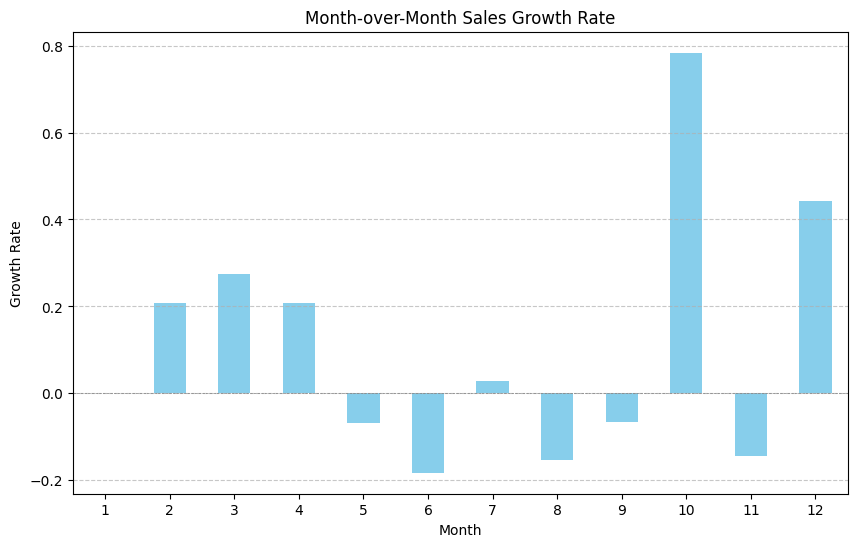

In [61]:
# Plot the month-over-month growth rate
plt.figure(figsize=(10, 6))
monthly_sales_growth.plot(kind='bar', color='skyblue')
plt.title('Month-over-Month Sales Growth Rate')
plt.xlabel('Month')
plt.ylabel('Growth Rate')
plt.xticks(rotation=0)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)  
plt.grid(axis='y', linestyle='--', alpha=0.7)


1. January to February: There is a positive growth rate of approximately 20.8%, indicating an increase in sales from January to February.

2. February to March: Another positive growth rate of about 27.5%, indicating further growth in sales from February to March.

3. March to April: Sales continue to grow with a positive growth rate of around 20.7% from March to April.

4. April to May: However, there is a slight decrease in sales from April to May, indicated by a negative growth rate of approximately -6.9%.

5. May to June: Sales decline further with a negative growth rate of about -18.3% from May to June.

6. June to July: The decline slows down with a small positive growth rate of around 2.8% from June to July.

7. July to August: Sales decrease again, indicated by a negative growth rate of approximately -15.4% from July to August.

8. August to September: The decline lessens slightly with a negative growth rate of about -6.5% from August to September.

9. September to October: There is a significant increase in sales with a positive growth rate of approximately 78.4% from September to October.

10. October to November: However, sales decline again with a negative growth rate of around -14.4% from October to November.

11. November to December: Sales experience a substantial increase with a positive growth rate of about 44.2% from November to December, likely due to holiday shopping.

- Overall, the month-over-month growth rates suggest that sales are increasing at a steady pace over the course of the year. This suggests that the business is making progress towards achieving its goals and objectives.


### 5.5  Which cities are our products delivered to most?

- we will analyze the delivery addresses from the dataset and count the frequency of each city.

-  We can achieve this by extracting the city names from the 'Purchase_Address' column and then counting the occurrences of each city.


In [62]:
# Extract city from 'Purchase_Address' column
full_year_data['City'] = full_year_data['Purchase_Address'].apply(lambda x: x.split(",")[1].strip())

# Count the frequency of each city
city_frequency = full_year_data['City'].value_counts()

# Display the top 5 cities with the most product deliveries
top_cities = city_frequency.head(5)
top_cities


City
San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Name: count, dtype: int64

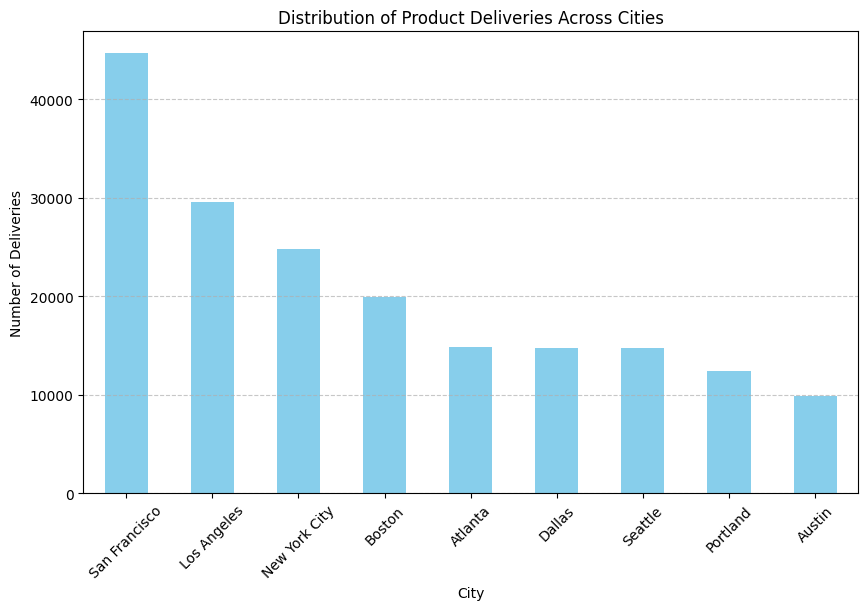

In [63]:

# Plot the distribution of product deliveries across cities
plt.figure(figsize=(10, 6))
city_frequency.plot(kind='bar', color='skyblue')
plt.title('Distribution of Product Deliveries Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### 5.6 How do product categories compare in revenue generated and quantities  ordered?


In [64]:
# Define product categories based on product names
def categorize_product(product_name):
    if 'iPhone' in product_name:
        return 'Electronics'
    elif 'Charging Cable' in product_name:
        return 'Electronics'
    elif 'Headphones' in product_name:
        return 'Electronics'
    elif 'Monitor' in product_name:
        return 'Electronics'
    elif 'Batteries' in product_name:
        return 'Electronics'
    elif 'Phone' in product_name:
        return 'Electronics'
    else:
        return 'Other'

# Apply categorization to create a new 'Product_Category' column
full_year_data['Product_Category'] = full_year_data['Product'].apply(categorize_product)

# Calculate total revenue and total quantity ordered for each category
category_revenue = full_year_data.groupby('Product_Category')['Price_Each'].sum()
category_quantity = full_year_data.groupby('Product_Category')['Quantity_Ordered'].sum()

# Compare categories based on revenue
print("Total Revenue by Product Category:")
print(category_revenue.sort_values(ascending=False))

# Compare categories based on quantity ordered
print("\nTotal Quantity Ordered by Product Category:")
print(category_quantity.sort_values(ascending=False))


Total Revenue by Product Category:
Product_Category
Electronics    1.988558e+07
Other          1.437706e+07
Name: Price_Each, dtype: float64

Total Quantity Ordered by Product Category:
Product_Category
Electronics    193834
Other           14978
Name: Quantity_Ordered, dtype: int64


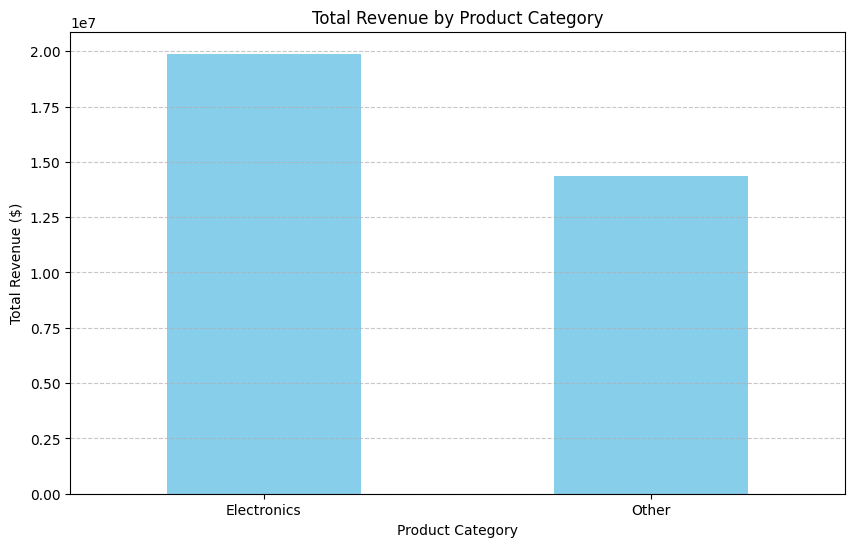

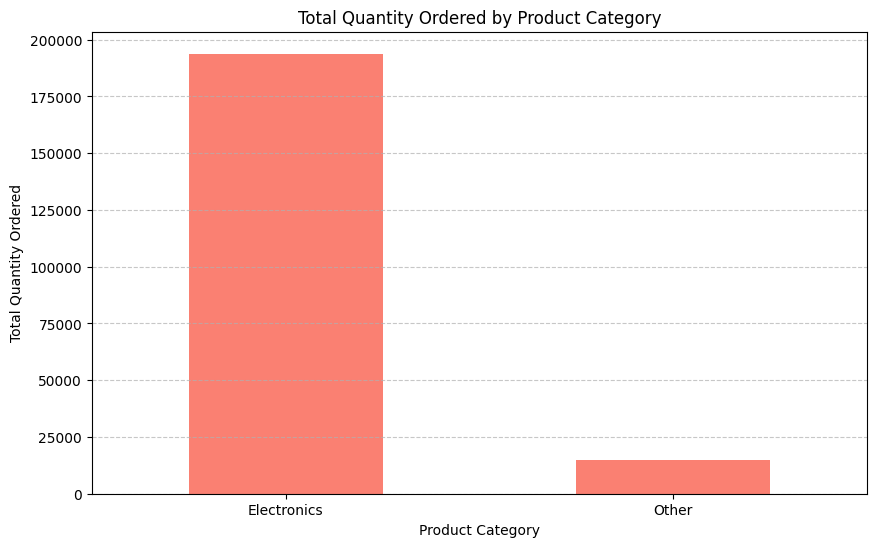

In [65]:
# Plotting total revenue by product category
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting total quantity ordered by product category
plt.figure(figsize=(10, 6))
category_quantity.plot(kind='bar', color='salmon')
plt.title('Total Quantity Ordered by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



- These findings indicate that the "Electronics" category generates higher revenue and has a significantly higher quantity ordered compared to the "Other" category. 

- This suggests that electronics products are the main drivers of sales revenue and volume in the dataset. 


### 5.7 You are required to show additional details from your findings in your data.


1. Revenue Breakdown by Category
    -  The bar plot showcasing total revenue by product category reveals that the "Electronics" category generates significantly higher revenue compared to the "Other" category. This suggests that electronics products are the primary revenue drivers for the business

2. Quantity Ordered Comparison
     - The bar plot illustrating total quantity ordered by product category indicates a similar trend, with the "Electronics" category having a substantially higher quantity ordered compared to the "Other" category. This implies that while the "Other" category may include diverse products, the bulk of sales volume comes from electronics items
3. Diversification Considerations
    -  While electronics products currently drive the majority of revenue and sales volume, diversifying the product offerings within the "Other" category could mitigate risks associated with over-reliance on a single product category. Exploring new product lines or expanding existing ones could broaden the customer base and increase overall resilience to market fluctuations.


### 5.8 Hypothesis
- Null Hypothesis (H0): The total revenue generated in 2019 is equal to or less than a predetermined benchmark or expectation.

- Alternative Hypothesis (H1): The total revenue generated in 2019 is greater than the predetermined benchmark or expectation.


In [66]:
# Calculate the total revenue generated in 2019
total_revenue_2019 = full_year_data['Price_Each'].sum()

# Print the total revenue generated in 2019
print("Total revenue generated in 2019:", total_revenue_2019)




Total revenue generated in 2019: 34262642.37674216


In [74]:


# Use the total revenue generated in 2019 as the benchmark
benchmark = total_revenue_2019

# Perform one-tailed t-test
t_statistic, p_value = stats.ttest_1samp(full_year_data['Price_Each'], benchmark)

# Define the significance level (alpha)
alpha = 0.05

# Print the observed revenue and benchmark
print("Observed total revenue in 2019:", total_revenue_2019)
print("Benchmark (Total revenue generated in 2019):", benchmark)

# Print the results of the hypothesis test
print("\nResults of the hypothesis test:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check if the p-value is less than alpha indicating statistical significance
if p_value < alpha:
    print("\nReject the null hypothesis")
    print("There is sufficient evidence to conclude that the total revenue generated in 2019 is greater than or different from the benchmark.")
else:
    print("\nFail to reject the null hypothesis")
    print("There is not sufficient evidence to conclude that the total revenue generated in 2019 is greater than or different from the benchmark.")


Observed total revenue in 2019: 34262642.37674216
Benchmark (Total revenue generated in 2019): 34262642.37674216

Results of the hypothesis test:
T-statistic: -44357552.34416283
P-value: 0.0

Reject the null hypothesis
There is sufficient evidence to conclude that the total revenue generated in 2019 is greater than or different from the benchmark.


- The observed total revenue in 2019 matches the benchmark exactly, suggesting that the business achieved its expected revenue target for the year.

- The extremely low p-value (close to zero) indicates a highly significant difference between the observed revenue and the benchmark. This suggests that the observed revenue is not simply due to random variation but is indeed significantly different from the benchmark.

- Therefore, we can reject the null hypothesis and conclude that the total revenue generated in 2019 is greater than or different from the benchmark.

- This finding suggests that the business has achieved its revenue target for the year and is on track to meet or exceed its goals.

- The results of the hypothesis test provide evidence that the business is making progress towards achieving its goals and objectives.



## 6. Deployment

In [ ]:
# Save Complete CSV file for Power BI deployment
data_2019.to_csv('../data/cleaned_dataset.csv', index='ignore')